In [ ]:
import numpy as np
import pickle
from sklearn.decomposition import RandomizedPCA
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
cat_names = ['Fenek', 'Larry', 'Hank']

# Load the images and class labels from files and split randomly into
# training and test sets

with open('ims.pkl', 'rb') as f:
     X = pickle.load(f)

with open('labels.pkl', 'rb') as f:
     y = pickle.load(f)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=15)

In [5]:
# Perform unsupervised dimensionality reduction using principal component analysis. 
# The resulting components are the eigenfaces. RandomizedPCA is faster on highly-dimensional data
# and produces very similar components to deterministic PCA.
pca = RandomizedPCA(n_components=16, whiten=True)
pca.fit(X_train)
X_train_tr = pca.transform(X_train)
X_test_tr = pca.transform(X_test)

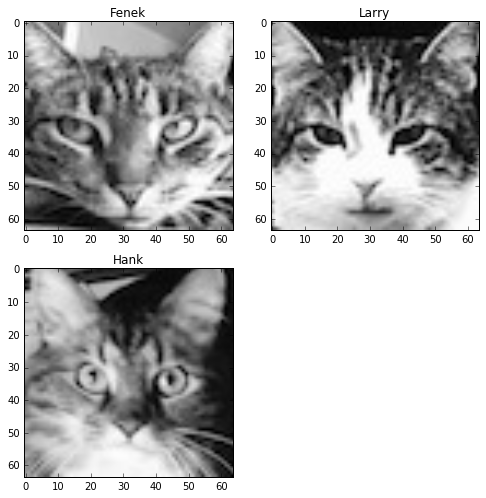

In [42]:
# plot example images for each class from the training data set
cats = plt.figure(2, figsize=(7, 7))
for i, name in enumerate(cat_names):
    im = cats.add_subplot(2, 2, i+1)
    im.imshow(X_test[y_test == i][0].reshape((64, 64)), cmap=plt.cm.gray)
    im.set_title(name)

plt.tight_layout()

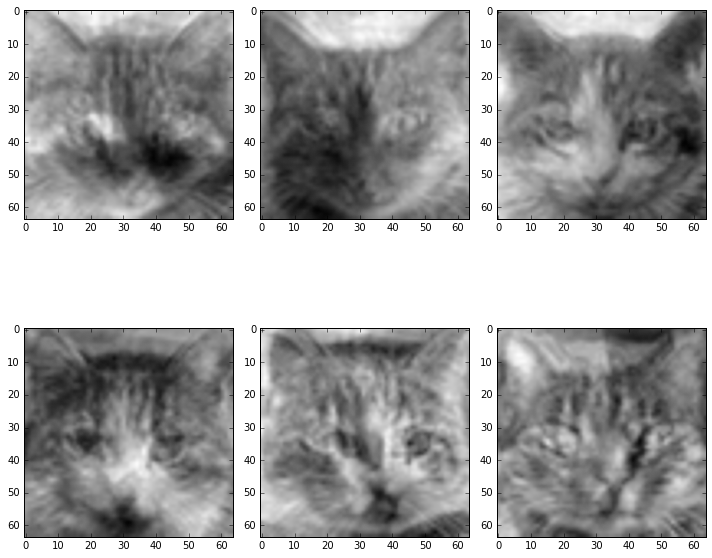

In [41]:
# plot first 6 eigenfaces 
eigcats = plt.figure(3, figsize=(10, 10))
for i, comp in enumerate(pca.components_[:6]):
    im = eigcats.add_subplot(2,3,i+1)
    im.imshow(comp.reshape((64, 64)), interpolation='gaussian', cmap=plt.cm.gray)

plt.tight_layout()

In [8]:
# search for optimal SVM parameters using grid search with 3-fold cross validation
Cs = np.logspace(0, 4, 5)
gammas = np.logspace(-6, 1, 8)
param_grid = {'C': Cs, 'kernel': ['rbf'], 'gamma': gammas}
clf = GridSearchCV(estimator=SVC(), param_grid=param_grid)
 
clf.fit(X_train_tr, y_train)
y_hat = clf.predict(X_test_tr)
print(clf.best_estimator_)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [9]:
# precision is the ratio tp / (tp + fp), i.e. the ratio of images correctly classified as class C to all 
# images classified as class C (both correctly and incorrectly).
# recall is the ratio tp / (tp + fn), i.e the ratio of images correctly classified as class C to all class C images in
# the dataset (or, the proportion of class C images 'recalled' from the data).
# f1-score is the harmonic mean of precision and recall.
# the element (i,j) of confusion matrix is the number of test examples belonging to class i but classified as j.
# entries on the diagonal represent correctly classified examples.
print(classification_report(y_test, y_hat, target_names=cat_names))
print(confusion_matrix(y_test, y_hat))

             precision    recall  f1-score   support

      Fenek       1.00      0.75      0.86         4
      Larry       1.00      1.00      1.00         7
       Hank       0.80      1.00      0.89         4

avg / total       0.95      0.93      0.93        15

[[3 0 1]
 [0 7 0]
 [0 0 4]]


Fenek


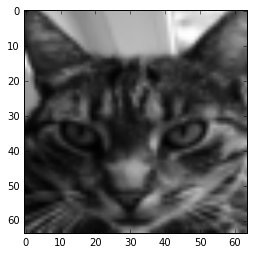

In [47]:
# load a completely new image and classify it - done for demonstration purposes.
with open('test_image.pkl', 'rb') as f:
    test = pickle.load(f).reshape((1, -1))

test_fig = plt.figure(4)
test_im = test_fig.add_subplot(1, 1, 1)
test_im.imshow(test.reshape((64, 64)), cmap=plt.cm.gray)
    
test = pca.transform(test)
print(cat_names[clf.predict(test)[0]])